In [1]:
%matplotlib inline

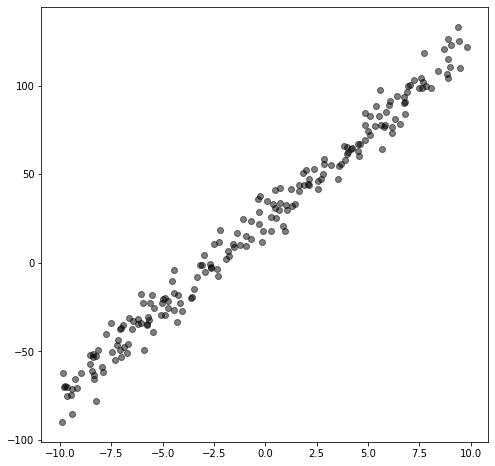

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color="black", alpha=0.5)
plt.show()



In [3]:
epochs = 1000
lr = 0.05
seta_0 = 1
seta_1 = 0
prev = 0
err_list = []
seta_0_list = []
seta_1_list = []
M = len(x_data)
for i in range(epochs):
    err1 = 0
    err2 = 0
    for x_i, y_i in zip(x_data, y_data):
        y_hat = x_i * seta_1 + seta_0
        err = y_i - y_hat
        err1 += err
        err2 += err * x_i
    
    seta_1 = seta_1 + lr * err2 / M
    seta_0 = seta_0 + lr * err1 / M
    
    #history
    err_list.append(-1 * err1/M)
    seta_0_list.append(seta_0)
    seta_1_list.append(seta_1)
    
    # checking convergence
    if abs(prev - err1/M) < pow(0.1, 5) :
        break
    
    prev = err1/M

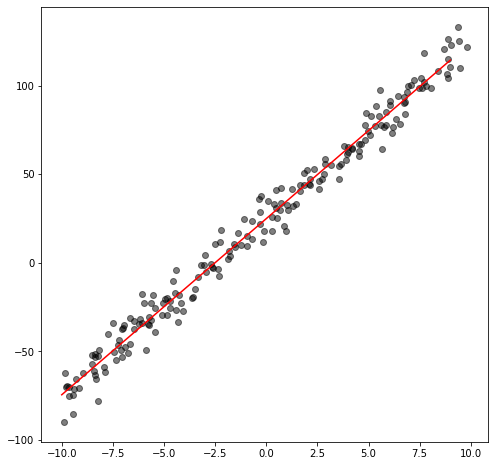

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color="black", alpha=0.5)
x_for_line = np.arange(-10, 10, 1)
y_for_line = x_for_line * seta_1 + seta_0
plt.plot(x_for_line, y_for_line, color='red')
plt.show()

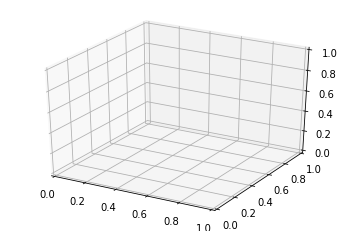

In [5]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

seta0 = np.arange(-30, 30, 0.1)
seta1 = np.arange(-30, 30, 0.1)

seta0, seta1 = np.meshgrid(seta0, seta1)
Z = np.zeros(seta0.shape)

In [6]:
for i_x in range(seta0.shape[0]):
    for i_y in range(seta0.shape[0]):
        err = np.sum(np.power(seta0[i_x][i_y]*np.ones(x_data.shape) + seta1[i_x][i_y]*x_data - y_data,2))
        Z[i_x][i_y] = err / (2*len(x_data))

 

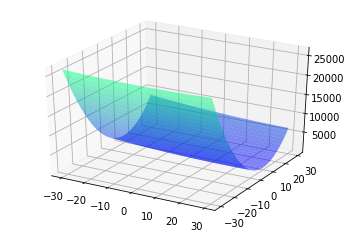

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(seta0, seta1, Z, cmap='winter',linewidth=0, antialiased=True, alpha=0.5)
plt.show()